IMPORT LIBRARIES
==

In [545]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import FileLink

**Importing Data set**

In [548]:
df = pd.read_csv("Retail_Apparel_Data_06.02.25_v1.csv")

In [189]:
df.head(5)

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category
0,10000,01/01/2021 10:20,74,3,2,24.00,Not Returned,In-Store,48.00,26-35,West,Footwear
1,10001,08/01/2021 03:10,92,10,6,40.24,Not Returned,In-Store,241.44,18-25,South,Footwear
2,1000,05/01/2021 20:24,86,20,5,25.96,Not Returned,Online,129.80,18-25,East,Clothing
3,10002,11/01/2021 03:43,57,11,6,85.86,Not Returned,Online,515.16,46-55,North,Clothing
4,10003,02/01/2021 07:26,73,25,5,72.88,Not Returned,In-Store,364.40,56+,West,Clothing


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16898 entries, 0 to 16897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice Number      16898 non-null  int64  
 1   Date Time           16898 non-null  object 
 2   Customer ID         16898 non-null  int64  
 3   Product ID          16898 non-null  int64  
 4   Quantity            16898 non-null  int64  
 5   Price per Unit      16898 non-null  float64
 6   Return Status       16898 non-null  object 
 7   Sales Channel       16898 non-null  object 
 8   Total Sales         16898 non-null  float64
 9   Customer Age Group  16552 non-null  object 
 10  Region              16898 non-null  object 
 11  Product Category    16898 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.5+ MB


**Removing NULL and Duplicates**

In [550]:
df.isnull().sum()

Invoice Number          0
Date Time               0
Customer ID             0
Product ID              0
Quantity                0
Price per Unit          0
Return Status           0
Sales Channel           0
Total Sales             0
Customer Age Group    346
Region                  0
Product Category        0
dtype: int64

In [263]:
df.duplicated().sum()

0

In [531]:
df[df.duplicated(subset=['Invoice Number', 'Product ID'])]

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category
447,10456,2021-01-03 13:57:00,40,33,3,87.42,Not Returned,Online,262.26,26-35,East,Accessories
4713,14808,2021-01-08 02:05:00,14,7,7,74.24,Not Returned,In-Store,519.68,26-35,East,Footwear
5126,15235,2021-01-08 17:06:00,44,3,6,67.60,Not Returned,Online,405.60,26-35,East,Footwear
6665,10406,2021-01-03 03:13:00,12,41,7,29.24,Not Returned,Online,204.68,36-45,West,Accessories
11549,3982,2021-01-05 18:54:00,62,36,6,80.71,Not Returned,In-Store,484.26,46-55,East,Clothing
14619,7440,2021-01-01 19:29:00,75,1,3,81.51,Not Returned,Online,244.53,56+,West,Accessories
15996,8991,2021-01-07 05:02:00,20,11,3,88.68,Not Returned,In-Store,266.04,46-55,North,Clothing
16119,9132,2021-01-08 00:19:00,96,45,6,62.91,Not Returned,In-Store,377.46,36-45,North,Footwear
16642,9720,2021-01-05 12:55:00,58,24,10,29.37,Not Returned,Online,29.37,26-35,West,Accessories


In [584]:
df[df['Invoice Number'] == 10456]

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category
446,10456,2021-01-03 17:46:00,40,33,3,87.42,Not Returned,Online,262.26,26-35,East,Accessories
447,10456,2021-01-03 13:57:00,40,33,3,87.42,Not Returned,Online,262.26,26-35,East,Accessories


In [588]:
df[df['Invoice Number'] == 10406]

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category
394,10406,2021-01-03 03:13:00,12,43,2,73.85,Not Returned,Online,147.70,36-45,West,Clothing
3270,10406,2021-01-03 03:13:00,12,41,6,62.93,Not Returned,Online,377.58,36-45,West,Accessories
6665,10406,2021-01-03 03:13:00,12,41,7,29.24,Not Returned,Online,204.68,36-45,West,Accessories
8668,10406,2021-01-03 03:13:00,12,50,2,89.26,Not Returned,Online,178.52,36-45,West,Accessories
11629,10406,2021-01-03 03:13:00,12,20,2,54.08,Not Returned,Online,108.16,36-45,West,Clothing
15354,10406,2021-01-03 03:13:00,12,21,3,63.67,Not Returned,Online,191.01,36-45,West,Clothing


In [646]:
df[df['Invoice Number'] == 9720]

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category
16641,9720,2021-01-05 09:44:00,58,24,1,29.37,Not Returned,Online,29.37,26-35,West,Accessories
16642,9720,2021-01-05 12:55:00,58,24,10,29.37,Not Returned,Online,29.37,26-35,West,Accessories


In [642]:
df[df.duplicated(subset=['Invoice Number', 'Product ID','Quantity'])]

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category
447,10456,2021-01-03 13:57:00,40,33,3,87.42,Not Returned,Online,262.26,26-35,East,Accessories
4713,14808,2021-01-08 02:05:00,14,7,7,74.24,Not Returned,In-Store,519.68,26-35,East,Footwear
5126,15235,2021-01-08 17:06:00,44,3,6,67.60,Not Returned,Online,405.60,26-35,East,Footwear
11549,3982,2021-01-05 18:54:00,62,36,6,80.71,Not Returned,In-Store,484.26,46-55,East,Clothing
14619,7440,2021-01-01 19:29:00,75,1,3,81.51,Not Returned,Online,244.53,56+,West,Accessories
15996,8991,2021-01-07 05:02:00,20,11,3,88.68,Not Returned,In-Store,266.04,46-55,North,Clothing
16119,9132,2021-01-08 00:19:00,96,45,6,62.91,Not Returned,In-Store,377.46,36-45,North,Footwear


In [648]:
invoice_time_counts = df.groupby('Invoice Number')['Date Time'].nunique()

In [650]:
invoice_time_counts[invoice_time_counts>1]

Invoice Number
3982     2
7440     2
8991     2
9132     2
9720     2
10456    2
14808    2
15235    2
Name: Date Time, dtype: int64

In [656]:
df.count()

Invoice Number        16897
Date Time             16897
Customer ID           16897
Product ID            16897
Quantity              16897
Price per Unit        16897
Return Status         16897
Sales Channel         16897
Total Sales           16897
Customer Age Group    16897
Region                16897
Product Category      16897
dtype: int64

In [660]:
df = df.drop_duplicates(subset = ['Invoice Number','Product ID'])

In [662]:
df.count()

Invoice Number        16888
Date Time             16888
Customer ID           16888
Product ID            16888
Quantity              16888
Price per Unit        16888
Return Status         16888
Sales Channel         16888
Total Sales           16888
Customer Age Group    16888
Region                16888
Product Category      16888
dtype: int64

In [265]:
df.describe()

,Invoice Number,Customer ID,Product ID,Quantity,Price per Unit,Total Sales
count,16898.000000,16898.000000,16898.000000,16898.000000,16898.000000,16898.000000
mean,10473.348503,50.206001,25.463960,3.988164,60.099128,240.033409
std,5474.453895,28.896081,14.395134,2.049422,23.229113,159.466443
min,1000.000000,1.000000,1.000000,1.000000,20.000000,20.120000
25%,5726.250000,25.000000,13.000000,2.000000,40.050000,107.947500
50%,10461.000000,50.000000,25.000000,4.000000,59.870000,200.500000
75%,15211.750000,75.000000,38.000000,6.000000,80.607500,341.662500
max,19999.000000,100.000000,50.000000,60.000000,99.990000,699.930000


In [552]:
df['Customer Age Group'].unique()

array(['26-35', '18-25', '46-55', '56+', '36-45', nan], dtype=object)

In [554]:
df[df['Customer Age Group'].isna()].groupby('Customer ID').nunique()

,Invoice Number,Date Time,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category
Customer ID,,,,,,,,,,,
7,160,159,47,7,162,2,4,161,0,1,5
8,181,181,48,7,183,2,4,183,0,1,5


In [522]:
(df['Customer Age Group'].mode()[0])

'46-55'

In [556]:
df.loc[(df['Customer ID'] == 7) & (df['Customer Age Group'].isna()), 'Customer Age Group'] = '46-55'

In [558]:
df.loc[(df['Customer ID'] == 8) & (df['Customer Age Group'].isna()), 'Customer Age Group'] = '46-55'

In [279]:
df.nunique()

Invoice Number        16817
Date Time              9998
Customer ID             100
Product ID               50
Quantity                 10
Price per Unit         7008
Return Status             2
Sales Channel             4
Total Sales           12783
Customer Age Group        5
Region                    4
Product Category          5
dtype: int64

SPELLING CHECK
==

In [283]:
df['Return Status'].unique()

array(['Not Returned', 'Returned'], dtype=object)

In [560]:
df['Sales Channel'] = df['Sales Channel'].str.replace('In Store','In-Store')
df['Sales Channel'] = df['Sales Channel'].str.replace('On line','Online')

In [287]:
df['Sales Channel'].unique()

array(['In-Store', 'Online'], dtype=object)

In [562]:
df['Product Category'] = df['Product Category'].str.replace('Acessories','Accessories')
df['Product Category'] = df['Product Category'].str.replace('Foot wear','Footwear')

In [291]:
df['Product Category'].unique()

array(['Footwear', 'Clothing', 'Accessories'], dtype=object)

In [293]:
df['Customer Age Group'].unique()

array(['26-35', '18-25', '46-55', '56+', '36-45'], dtype=object)

In [295]:
df['Region'].unique()

array(['West', 'South', 'East', 'North'], dtype=object)

# Outliers

<Axes: xlabel='Quantity'>

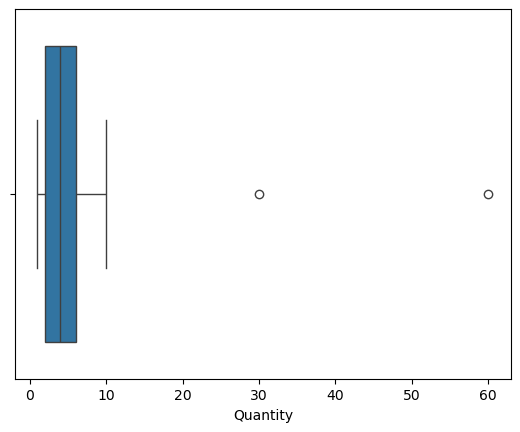

In [297]:
sns.boxplot(x=df['Quantity'])

In [317]:
df[df['Quantity']>10]

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category


In [564]:
df.loc[16119,'Quantity'] = 6

In [566]:
df.loc[15996,'Quantity'] = 3

<Axes: xlabel='Price per Unit'>

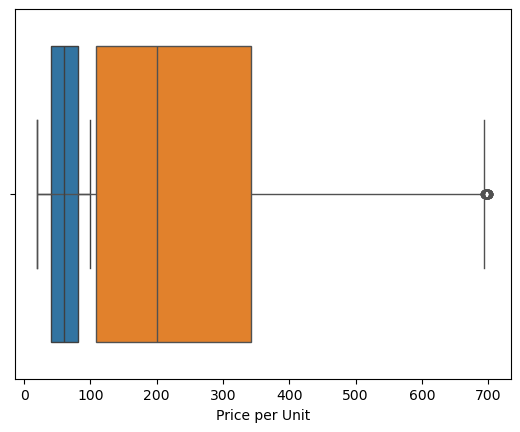

In [165]:
sns.boxplot(x=df['Price per Unit'])
sns.boxplot(x=df['Total Sales'])

# Date Formatting


In [568]:
df['Date Time'] = pd.to_datetime(df['Date Time'],format = '%d/%m/%Y %H:%M')


#df['Date Time'] = df['Date Time'].apply(lambda x: x.replace(year=2021) if x.year == 2031 else x)


In [329]:
df.head()

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category
0,10000,2021-01-01 10:20:00,74,3,2,24.00,Not Returned,In-Store,48.00,26-35,West,Footwear
1,10001,2021-01-08 03:10:00,92,10,6,40.24,Not Returned,In-Store,241.44,18-25,South,Footwear
2,1000,2021-01-05 20:24:00,86,20,5,25.96,Not Returned,Online,129.80,18-25,East,Clothing
3,10002,2021-01-11 03:43:00,57,11,6,85.86,Not Returned,Online,515.16,46-55,North,Clothing
4,10003,2021-01-02 07:26:00,73,25,5,72.88,Not Returned,In-Store,364.40,56+,West,Clothing


In [570]:
df.loc[df['Date Time']>'2021-02-01','Date Time']

9764   2031-01-26 01:03:00
Name: Date Time, dtype: datetime64[ns]

In [572]:
df.loc[df['Date Time']>'2021-02-01','Date Time'] = '2021-01-26 01:03:00'

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16898 entries, 0 to 16897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Invoice Number      16898 non-null  int64         
 1   Date Time           16898 non-null  datetime64[ns]
 2   Customer ID         16898 non-null  int64         
 3   Product ID          16898 non-null  int64         
 4   Quantity            16898 non-null  int64         
 5   Price per Unit      16898 non-null  float64       
 6   Return Status       16898 non-null  object        
 7   Sales Channel       16898 non-null  object        
 8   Total Sales         16898 non-null  float64       
 9   Customer Age Group  16898 non-null  object        
 10  Region              16898 non-null  object        
 11  Product Category    16898 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.5+ MB


# EDA

In [178]:
df.describe()

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Total Sales
count,16550.000000,16550,16550.000000,16550.000000,16550.000000,16550.000000,16550.000000
mean,10473.106284,2021-01-06 17:06:10.125679616,51.097281,25.447492,3.984834,60.130172,240.288611
min,1000.000000,2021-01-01 00:01:00,1.000000,1.000000,1.000000,20.000000,20.120000
25%,5734.000000,2021-01-03 18:49:00,27.000000,13.000000,2.000000,40.072500,107.947500
50%,10461.000000,2021-01-06 12:00:30,51.500000,25.000000,4.000000,59.890000,200.565000
75%,15201.750000,2021-01-09 06:08:00,75.000000,38.000000,6.000000,80.637500,342.435000
max,19999.000000,2031-01-26 01:03:00,100.000000,50.000000,10.000000,99.990000,699.930000
std,5471.114018,NaN,28.521582,14.394164,1.994390,23.225678,159.634292


In [345]:
df.nunique()

Invoice Number        16817
Date Time              9998
Customer ID             100
Product ID               50
Quantity                  8
Price per Unit         7008
Return Status             2
Sales Channel             2
Total Sales           12783
Customer Age Group        5
Region                    4
Product Category          3
dtype: int64

In [ ]:
#df.set_index(['Invoice Number','Product ID'],inplace = True)

**1.Sales Performance**

In [355]:
df['Total Sales'].sum()

4056084.54

In [385]:
df.groupby(['Invoice Number', 'Customer ID'])[['Total Sales' ]].sum().sort_values('Total Sales',ascending = False).head(5)

,,Total Sales
Invoice Number,Customer ID,
10069,4,2899.11
10678,68,2023.89
10425,45,1747.16
11311,90,1739.53
10187,17,1486.47


In [395]:
df.groupby(df['Date Time'].dt.date)['Total Sales'].sum()

Date Time
2021-01-01    356726.52
2021-01-02    359684.26
2021-01-03    370980.07
2021-01-04    370179.61
2021-01-05    374335.48
2021-01-06    382449.04
2021-01-07    382629.52
2021-01-08    359478.44
2021-01-09    361295.73
2021-01-10    374523.45
2021-01-11    363611.08
2021-01-26       191.34
Name: Total Sales, dtype: float64

In [463]:
df.groupby(df['Date Time'].dt.day_name())['Total Sales'].sum().sort_values()

Date Time
Tuesday      374335.48
Wednesday    382449.04
Thursday     382629.52
Friday       716204.96
Saturday     720979.99
Monday       733790.69
Sunday       745503.52
Name: Total Sales, dtype: float64

In [411]:
df[df['Date Time']>'2021-01-12']

,Invoice Number,Date Time,Customer ID,Product ID,Quantity,Price per Unit,Return Status,Sales Channel,Total Sales,Customer Age Group,Region,Product Category


In [574]:
df = df.drop(9764)

<Axes: xlabel='Date Time'>

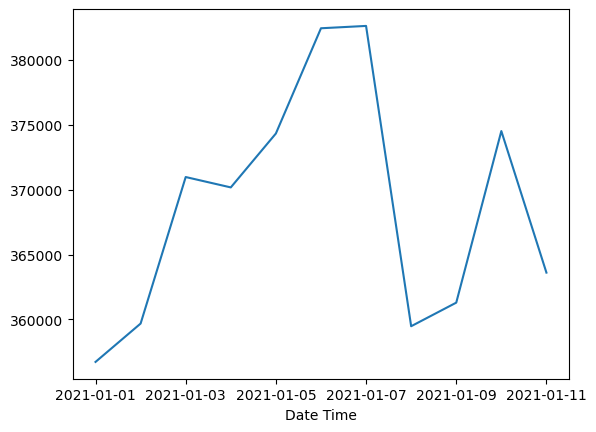

In [576]:
df.groupby(df['Date Time'].dt.date)['Total Sales'].sum().plot()

<Axes: xlabel='Date Time'>

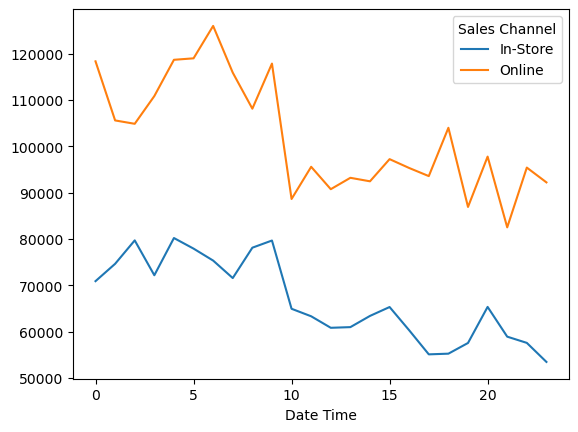

In [783]:
df.groupby([df['Date Time'].dt.hour,'Sales Channel'])['Total Sales'].sum().unstack().plot(kind = 'line')

<Axes: xlabel='Date Time'>

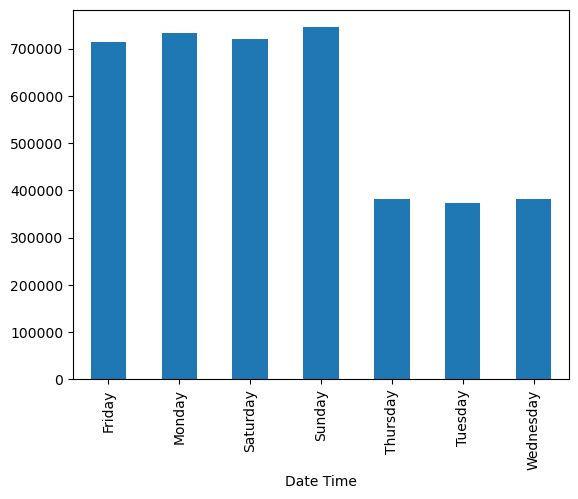

In [775]:
df.groupby([df['Date Time'].dt.day_name()])['Total Sales'].sum().plot(kind = 'bar')

In [423]:
df.groupby('Product Category')['Total Sales'].sum()

Product Category
Accessories     873524.91
Clothing       1400668.01
Footwear       1781700.28
Name: Total Sales, dtype: float64

In [425]:
df.groupby('Sales Channel')['Total Sales'].sum()

Sales Channel
In-Store    1604117.69
Online      2451775.51
Name: Total Sales, dtype: float64

<Axes: xlabel='Product Category'>

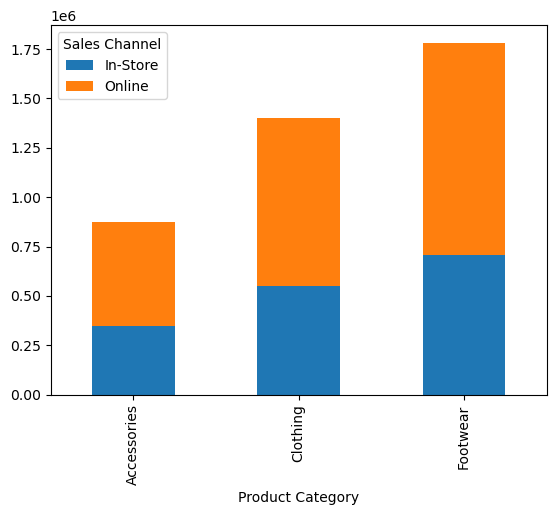

In [445]:
df.groupby(['Product Category','Sales Channel'])['Total Sales'].sum().unstack().plot(kind = 'bar',stacked = True)

<Axes: xlabel='Region'>

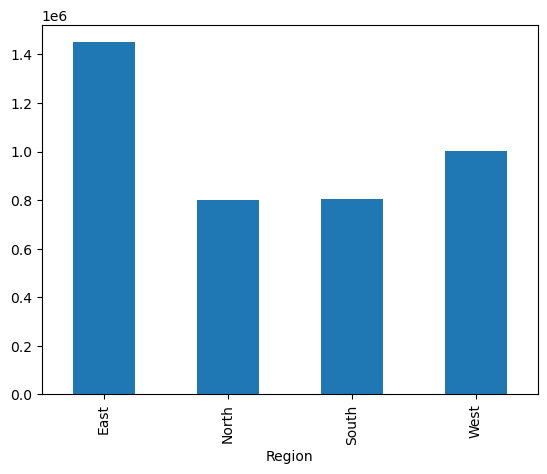

In [449]:
df.groupby(['Region'])['Total Sales'].sum().plot(kind = 'bar')

<Axes: xlabel='Region'>

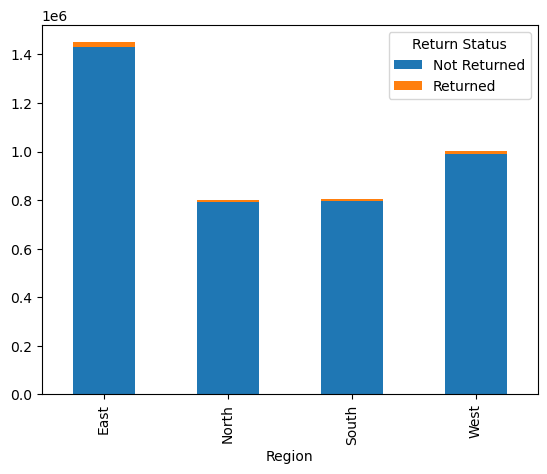

In [453]:
df.groupby(['Region','Return Status'])['Total Sales'].sum().unstack().plot(kind = 'bar',stacked = True)

**2. Customer Bhaviour**

<Axes: xlabel='Customer Age Group'>

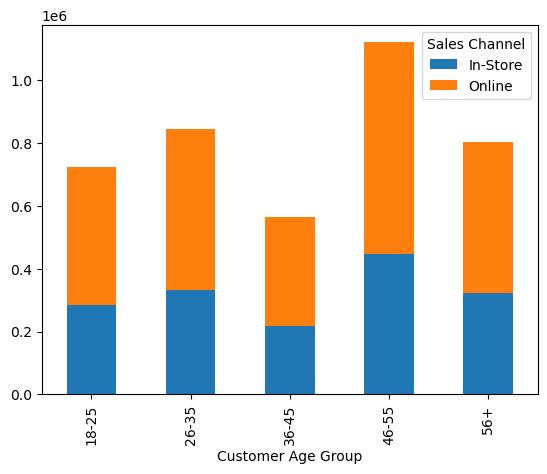

In [465]:
df.groupby(['Customer Age Group','Sales Channel'])['Total Sales'].sum().unstack().plot(kind = 'bar',stacked = True)

In [474]:
df.groupby('Customer ID')['Total Sales'].sum().sort_values(ascending = False).head(10)

Customer ID
58     52299.16
4      51892.18
5      48838.04
100    48358.92
94     48346.04
87     47335.75
10     47231.16
6      46865.48
93     46019.19
26     45951.65
Name: Total Sales, dtype: float64

In [476]:
df.groupby('Customer ID')['Invoice Number'].count().sort_values(ascending = False).head(10)

Customer ID
58    219
4     201
94    194
30    193
52    192
84    192
10    191
26    191
24    190
63    189
Name: Invoice Number, dtype: int64

In [478]:
(df.groupby('Customer ID')['Total Sales'].sum()/df.groupby('Customer ID')['Invoice Number'].count()).sort_values(ascending = False).head(10)

Customer ID
5      268.340879
11     267.590429
100    267.176354
95     263.799677
87     258.665301
4      258.170050
51     257.234201
93     257.090447
97     255.393558
78     255.000974
dtype: float64

In [417]:
df.columns

Index(['Invoice Number', 'Date Time', 'Customer ID', 'Product ID', 'Quantity',
       'Price per Unit', 'Return Status', 'Sales Channel', 'Total Sales',
       'Customer Age Group', 'Region', 'Product Category'],
      dtype='object')

In [ ]:
#top-selling products

In [248]:
df.groupby('Product ID')['Quantity'].sum().sort_values(ascending = False).head(10)

Product ID
3     1507
22    1505
40    1505
49    1494
21    1481
5     1468
2     1460
45    1457
19    1450
32    1448
Name: Quantity, dtype: int64

In [250]:
df.groupby('Product ID')['Total Sales'].sum().sort_values(ascending = False).head(10)

Product ID
40    93071.89
22    93056.90
3     92487.59
21    90995.58
49    88388.18
38    87479.46
9     87450.04
5     87449.90
19    86981.47
2     86885.10
Name: Total Sales, dtype: float64

In [ ]:
#unit Prices

In [349]:
df.groupby(['Product ID','Region','Sales Channel'])['Price per Unit'].mean().sort_values(ascending = False)

Product ID  Region  Sales Channel
24          West    In-Store         73.658636
27          North   In-Store         70.970435
46          South   In-Store         69.943810
7           North   In-Store         69.231176
22          West    Online           69.010851
                                       ...    
50          West    In-Store         51.509333
15          North   In-Store         51.436667
9           North   Online           51.300208
39          East    In-Store         51.245833
6           North   In-Store         50.723871
Name: Price per Unit, Length: 400, dtype: float64

In [351]:
df.groupby(['Product ID','Sales Channel'])['Price per Unit'].mean().sort_values(ascending = False)

Product ID  Sales Channel
17          Online           64.050580
40          In-Store         63.696687
9           In-Store         63.351223
45          In-Store         62.987464
22          Online           62.951227
                               ...    
43          In-Store         56.831404
12          In-Store         56.526154
11          In-Store         56.493529
32          In-Store         56.313028
44          In-Store         56.243459
Name: Price per Unit, Length: 100, dtype: float64

<Axes: xlabel='Date Time'>

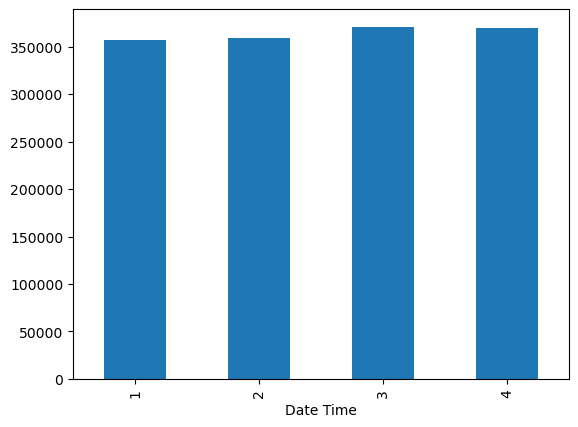

In [638]:
df[(df['Date Time']>'2021-01-01')&(df['Date Time']<'2021-01-5')].groupby(df['Date Time'].dt.day)['Total Sales'].sum().plot(kind = 'bar')

In [514]:
costomer_visits = df.groupby('Customer ID')['Invoice Number'].nunique()

In [520]:
costomer_visits[costomer_visits > 190]

Customer ID
4     192
10    191
26    191
52    192
58    216
84    192
94    194
Name: Invoice Number, dtype: int64

In [624]:
df_value_customer = df.groupby('Customer ID')['Total Sales'].sum().sort_values(ascending = False)


KPI 
==


**1.Product Penetration:**

In [675]:
df['Invoice Number'].nunique()

16816

In [677]:
(df.groupby('Product ID')['Invoice Number'].count()/df['Invoice Number'].nunique())*100

Product ID
1     1.914843
2     2.164605
3     2.164605
4     1.908896
5     2.194339
6     1.932683
7     1.920790
8     1.849429
9     2.075404
10    1.944577
11    2.015937
12    1.891056
13    1.968363
14    1.992150
15    1.926736
16    2.027831
17    1.926736
18    1.938630
19    2.158658
20    1.932683
21    2.206232
22    2.194339
23    2.170552
24    2.009990
25    2.087298
26    1.920790
27    1.897003
28    2.140818
29    1.992150
30    2.075404
31    1.843482
32    2.105138
33    1.855376
34    1.998097
35    1.897003
36    2.105138
37    1.944577
38    2.140818
39    1.998097
40    2.170552
41    1.986204
42    2.033777
43    1.974310
44    1.968363
45    2.182445
46    1.998097
47    1.855376
48    1.843482
49    2.218126
50    1.766175
Name: Invoice Number, dtype: float64

In [ ]:
production_penetration = df.groupby('Product ID')['Invoice Number'].nunique()/df['Invoice Number'].nunique()*100
production_penetration_df = production_penetration.reset_index()
production_penetration_df.columns = ['Product ID', 'Product Penetration (%)']

In [ ]:
production_penetration_df.to_csv("production_penetration_df", index=False, encoding='utf-8')

**2. Average Invoice Value:**

In [691]:
df.groupby('Invoice Number')['Total Sales'].sum()

Invoice Number
1000     129.80
1001      64.32
1002      91.12
1003     945.06
1004     562.94
          ...  
19995    299.46
19996    142.38
19997    482.23
19998     70.24
19999    403.69
Name: Total Sales, Length: 16816, dtype: float64

In [ ]:
df.groupby(['Customer Age Group'])['Total Sales'].sum()

In [ ]:
df.groupby(['Customer Age Group'])['Invoice Number'].nunique()

In [693]:
df.groupby(['Customer Age Group'])['Total Sales'].sum()/df.groupby(['Customer Age Group'])['Invoice Number'].nunique()

Customer Age Group
18-25    242.739245
26-35    240.071888
36-45    240.871977
46-55    238.054531
56+      244.859242
dtype: float64

In [695]:
df.groupby(['Sales Channel'])['Total Sales'].sum()/df.groupby(['Sales Channel'])['Invoice Number'].nunique()

Sales Channel
In-Store    241.59057
Online      240.65885
dtype: float64

In [697]:
df.groupby(['Return Status'])['Total Sales'].sum()/df.groupby(['Return Status'])['Invoice Number'].nunique()

Return Status
Not Returned    240.87422
Returned        252.28456
dtype: float64

In [699]:
df.groupby(['Customer Age Group','Sales Channel'])['Total Sales'].sum()/df.groupby(['Customer Age Group','Sales Channel'])['Invoice Number'].nunique()

Customer Age Group  Sales Channel
18-25               In-Store         243.692200
                    Online           242.125317
26-35               In-Store         242.167378
                    Online           238.733238
36-45               In-Store         239.199549
                    Online           241.938486
46-55               In-Store         239.684028
                    Online           236.986554
56+                 In-Store         243.464781
                    Online           245.801695
dtype: float64

In [785]:
df.groupby(['Customer ID'])['Total Sales'].sum()/df.groupby(['Customer ID'])['Invoice Number'].nunique()

Customer ID
1      233.806491
2      257.359936
3      243.958333
4      270.271771
5      268.340879
          ...    
96     249.766309
97     255.393558
98     240.756391
99     248.978205
100    267.176354
Length: 100, dtype: float64

In [787]:
premium_customers = df.groupby(['Customer ID'])['Total Sales'].sum()/df.groupby(['Customer ID'])['Invoice Number'].nunique()

In [789]:
premium_customers.sort_values(ascending = False)

Customer ID
4      270.271771
5      268.340879
11     267.590429
100    267.176354
95     263.799677
          ...    
70     221.160893
39     218.822948
35     218.794052
21     215.902250
69     208.693620
Length: 100, dtype: float64

In [ ]:
premium_customers = df.groupby(['Customer ID'])['Total Sales'].sum()/df.groupby(['Customer ID'])['Invoice Number'].nunique()
premium_customers_df = premium_customers.reset_index()
premium_customers_df.columns = ['Customer ID', 'avg value of invoice']

In [ ]:
premium_customers_df.to_csv("premium_customers_df", index=False, encoding='utf-8')

**3. Rate of Returned Products**

In [722]:
Return_rates_df=df[df['Return Status']=='Returned'].groupby('Product ID')['Invoice Number'].count()/df.groupby(['Product ID']).size()*100

In [736]:
Return_rates_df[Return_rates_df.notnull()]

Product ID
1     3.726708
3     4.670330
4     2.180685
5     2.981030
14    1.791045
15    1.851852
19    3.856749
21    1.347709
22    2.981030
24    3.254438
25    1.994302
26    1.547988
31    3.225806
36    4.519774
38    5.000000
46    3.273810
49    4.021448
dtype: float64

In [742]:
#Return_rates_df[Return_rates_df.isnull()]

In [744]:
df[df['Return Status']=="Returned"].groupby(['Product Category','Sales Channel'])['Quantity'].sum()

Product Category  Sales Channel
Accessories       In-Store          41
                  Online            44
Clothing          In-Store         176
                  Online           182
Footwear          In-Store         144
                  Online           164
Name: Quantity, dtype: int64

In [746]:
df[df['Return Status']=="Returned"].groupby(['Product Category','Sales Channel'])['Quantity'].sum()/df.groupby(['Product Category','Sales Channel'])['Quantity'].sum()*100

Product Category  Sales Channel
Accessories       In-Store         0.704710
                  Online           0.507263
Clothing          In-Store         1.906826
                  Online           1.291055
Footwear          In-Store         1.243953
                  Online           0.918150
Name: Quantity, dtype: float64

**4. Sales Growth by Region:**

<Axes: title={'center': 'Sales by Channel & products'}, xlabel='Date Time'>

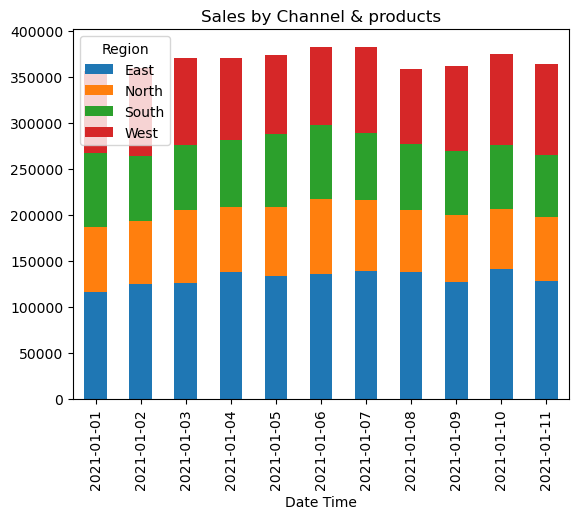

In [753]:
df.groupby([ df['Date Time'].dt.date,'Region'])['Total Sales'].sum().unstack().plot(kind='bar',stacked=True, title='Sales by Channel & products')

In [755]:
df.groupby([ df['Date Time'].dt.date,'Region'])['Total Sales'].sum()

Date Time   Region
2021-01-01  East      116346.96
            North      70887.56
            South      80313.98
            West       88933.49
2021-01-02  East      125071.43
            North      68099.70
            South      70985.92
            West       95527.21
2021-01-03  East      125585.37
            North      80207.03
            South      70570.44
            West       94150.29
2021-01-04  East      137972.66
            North      70446.56
            South      72894.39
            West       88866.00
2021-01-05  East      133439.98
            North      75553.59
            South      78710.20
            West       86118.08
2021-01-06  East      135701.38
            North      82007.29
            South      80321.11
            West       84419.26
2021-01-07  East      138928.77
            North      76739.73
            South      73731.04
            West       92963.94
2021-01-08  East      137711.39
            North      68069.18
            South    

<Axes: title={'center': 'Daily Sales Growth in Each Region'}, xlabel='Date Time'>

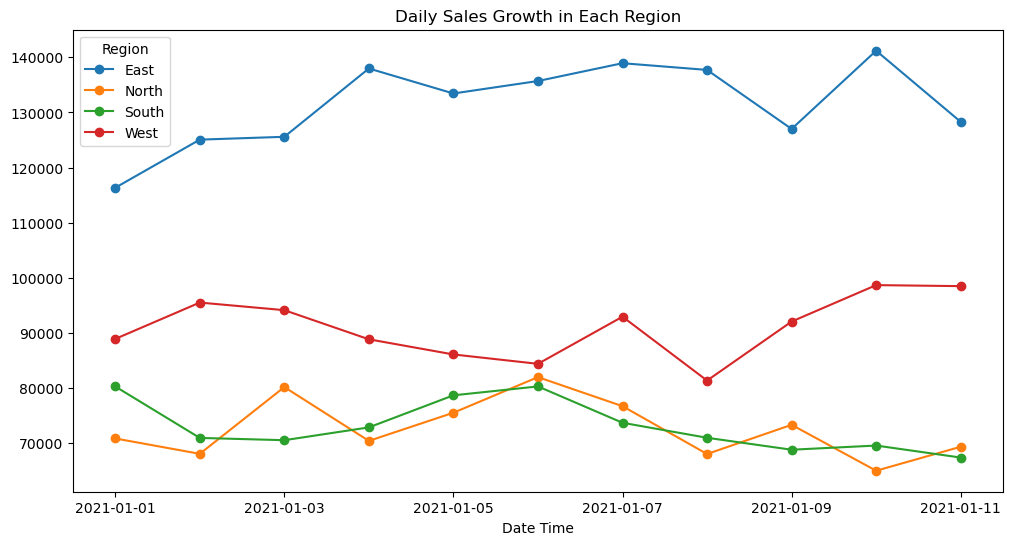

In [757]:
df.groupby([ df['Date Time'].dt.date,'Region'])['Total Sales'].sum().unstack().plot(
    kind='line', figsize=(12, 6), marker='o', title="Daily Sales Growth in Each Region"
)

<Axes: title={'center': 'Daily Sales Growth by Product Category in East Region'}, xlabel='Date Time'>

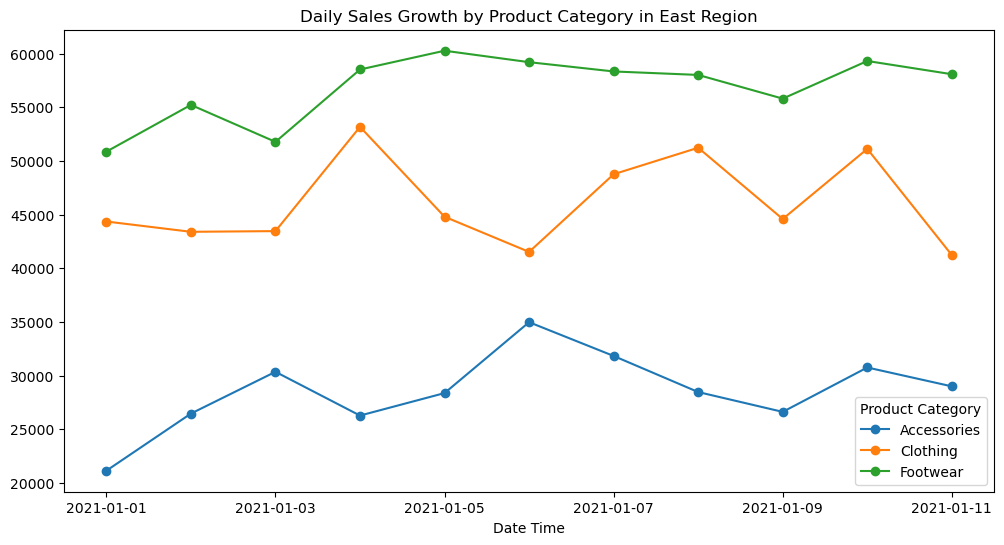

In [759]:
df[df['Region'] == "East"].groupby([df['Date Time'].dt.date, 'Product Category'])['Total Sales'].sum().unstack().plot(
    kind='line', figsize=(12, 6), marker='o', title="Daily Sales Growth by Product Category in East Region"
)

In [793]:
df.nunique()

Invoice Number        16816
Date Time              9994
Customer ID             100
Product ID               50
Quantity                  7
Price per Unit         7008
Return Status             2
Sales Channel             2
Total Sales           12782
Customer Age Group        5
Region                    4
Product Category          3
dtype: int64

Series([], Name: Sales Channel, dtype: int64)

In [761]:
df.columns

Index(['Invoice Number', 'Date Time', 'Customer ID', 'Product ID', 'Quantity',
       'Price per Unit', 'Return Status', 'Sales Channel', 'Total Sales',
       'Customer Age Group', 'Region', 'Product Category'],
      dtype='object')